PENGUINS


In [28]:
import pandas as pd
penguins=pd.read_csv('/content/penguins.csv').dropna()
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [29]:
#manual scaling features as eep Learning models work best when features are on similar scales
penguins['FlipperLength']=penguins['FlipperLength']/10
penguins['BodyMass']=penguins['BodyMass']/100
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
339,55.8,19.8,20.7,40.00,2
340,43.5,18.1,20.2,34.00,2
341,49.6,18.2,19.3,37.75,2
342,50.8,19.0,21.0,41.00,2


In [30]:
#oversampling
for i in range(1,3):
  penguins=penguins.append(penguins)
penguins

<ipython-input-30-cc5e30a70ba6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins=penguins.append(penguins)
<ipython-input-30-cc5e30a70ba6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins=penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
339,55.8,19.8,20.7,40.00,2
340,43.5,18.1,20.2,34.00,2
341,49.6,18.2,19.3,37.75,2
342,50.8,19.0,21.0,41.00,2


In [31]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

In [103]:
#spliting dataset 80/20
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.20,
                                                    random_state=42)
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 1094, Test Set: 274 

Sample of features and labels:
[45.5 14.5 21.2 47.5] 1 (Gentoo)
[37.8 18.1 19.3 37.5] 0 (Adelie)
[49.5 19.  20.  38. ] 2 (Chinstrap)
[41.3 21.1 19.5 44. ] 0 (Adelie)
[48.5 17.5 19.1 34. ] 2 (Chinstrap)
[36.4 17.1 18.4 28.5] 0 (Adelie)
[34.5 18.1 18.7 29. ] 0 (Adelie)
[41.4 18.6 19.1 37. ] 0 (Adelie)
[45.5 14.5 21.2 47.5] 1 (Gentoo)
[38.3 19.2 18.9 39.5] 0 (Adelie)
[38.1  16.5  19.8  38.25] 0 (Adelie)
[46.6 14.2 21.  48.5] 1 (Gentoo)
[43.5 14.2 22.  47. ] 1 (Gentoo)
[39.  18.7 18.5 36.5] 0 (Adelie)
[34.4  18.4  18.4  33.25] 0 (Adelie)
[49.  19.6 21.2 43. ] 2 (Chinstrap)
[42.2  19.5  19.7  42.75] 0 (Adelie)
[47.  17.3 18.5 37. ] 2 (Chinstrap)
[47.  17.3 18.5 37. ] 2 (Chinstrap)
[50.4 15.7 22.2 57.5] 1 (Gentoo)
[50.1 17.9 19.  34. ] 2 (Chinstrap)
[50.2 14.3 21.8 57. ] 1 (Gentoo)
[39.6 18.1 18.6 44.5] 0 (Adelie)
[48.7 15.1 22.2 53.5] 1 (Gentoo)


In [123]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1094, 4)
x_test shape (274, 4)
y_train shape (1094, 1)
y_test shape (274, 1)


labels should have one column ....lets reshape

In [124]:
#import numpy as np
#y_train=np.reshape(y_train,(-1,1))
#y_test=np.reshape(y_test,(-1,1))

In [125]:
y_train.shape

(1094, 1)

In [126]:
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

y_train shape (1094, 1)
y_test shape (274, 1)


In [127]:

#importing dependncies and printing versions
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.12.0
TensorFlow version: 2.12.0


we need to set the data type of our features to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values

In [128]:
y_train.shape

(1094, 1)

In [129]:
import numpy as np
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels(new thing i learned in this)

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)


In [130]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1094, 4)
(274, 4)
(1094, 3)
(274, 3)


In [131]:
len(features)

4

In [132]:
len(penguin_classes)

3

In [133]:
#creating model
hl=10#number of hidden layer nodes
model=Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl,input_dim=hl,activation='relu'))
model.add(Dense(len(penguin_classes),  activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                50        
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


1.model = Sequential(): This line initializes a sequential model, which is a linear stack of layers. It allows you to build the neural network model layer by layer.

2.model.add(Dense(hl, input_dim=len(features), activation='relu')): This line adds a dense (fully connected) layer to the model. The Dense layer represents a set of neurons that are fully connected to the previous layer. It has three important arguments:

3.hl: The number of nodes (neurons) in the hidden layer. In your code, hl is set to 10.

4.input_dim: The dimensionality (number of features) of the input data. It is set to len(features), which suggests that the length of the features list determines the input dimensionality.

5.activation='relu': The activation function applied to the outputs of the neurons in the layer. In this case, 'relu' refers to the Rectified Linear Unit activation function, which introduces non-linearity to the model.



structure of model

Layer 1: There are four input values going to ten output nodes, so there should be 4 x 10 weights and 10 bias values.

Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.

Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

In [136]:
learning_rate=0.001
opt=optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'] )
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
110/110 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0348 - val_accuracy: 0.9927
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9918 - val_loss: 0.0331 - val_accuracy: 0.9854
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.0411 - val_accuracy: 0.9818
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.0445 - val_accuracy: 0.9781
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9954 - val_loss: 0.0418 - val_accuracy: 0.9818
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0298 - val_accuracy: 0.9854
Epoch 

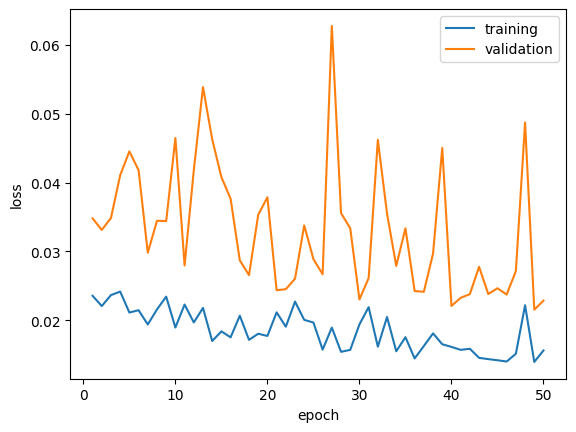

In [137]:
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

9/9 [==============================] - 0s 2ms/step


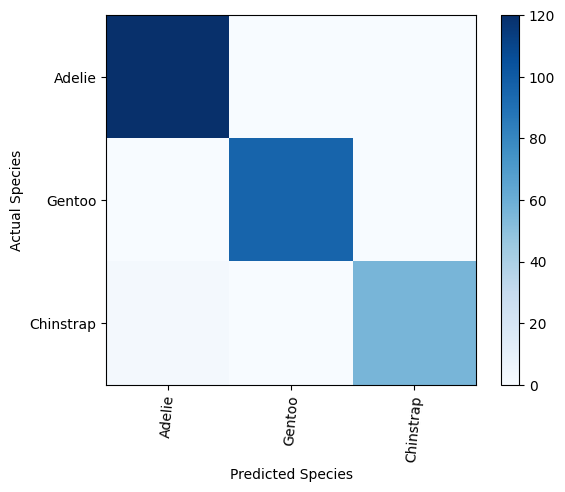

In [139]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

In [140]:
#saving model
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


In [141]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 [==============================] - 0s 54ms/step
Gentoo
